# ResNet50

Loading and preprocessing images...


100%|██████████| 2298/2298 [01:29<00:00, 25.80it/s]


Successfully loaded 2298 images out of 2298 total
Unique encoded labels: [0 1 2 3 4 5]
Class names: ['ACK' 'BCC' 'MEL' 'NEV' 'SCC' 'SEK']
Applying SMOTE...
Original data shape: (2298, 224, 224, 3)
After SMOTE: (5070, 224, 224, 3)
Building baseline model for saliency generation...
Quick training baseline model for saliency...
Epoch 1/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 28s 141ms/step - accuracy: 0.4747 - loss: 1.4637 - val_accuracy: 0.7258 - val_loss: 0.7600
Epoch 2/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.6869 - loss: 0.8212 - val_accuracy: 0.7544 - val_loss: 0.6578
Epoch 3/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.7612 - loss: 0.6479 - val_accuracy: 0.7850 - val_loss: 0.5776
Epoch 4/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7746 - loss: 0.6020 - val_accuracy: 0.8047 - val_loss: 0.5099
Epoch 5/5
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.8245 - loss: 0.4791 - val_accuracy: 0.8294 - val_loss: 0.4706
Generating saliency-augmented i

100%|██████████| 127/127 [30:07<00:00, 14.23s/it]


Generating saliency-augmented images...


100%|██████████| 32/32 [07:30<00:00, 14.08s/it]


Training the enhanced model...


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:619: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (4056, 224, 224, 6) (6 channels).
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 125s 816ms/step - accuracy: 0.3331 - auc: 0.6873 - loss: 1.8471 - precision: 0.3953 - recall: 0.1714 - val_accuracy: 0.5828 - val_auc: 0.8944 - val_loss: 1.0632 - val_precision: 0.7834 - val_recall: 0.2890 - learning_rate: 0.0010
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 78s 616ms/step - accuracy: 0.5201 - auc: 0.8587 - loss: 1.1743 - precision: 0.6615 - recall: 0.3253 - val_accuracy: 0.6361 - val_auc: 0.9208 - val_loss: 0.8887 - val_precision: 0.7207 - val_recall: 0.5089 - learning_rate: 0.0010
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 79s 622ms/step - accuracy: 0.5754 - auc: 0.8819 - loss: 1.0816 - precision: 0.6835 - recall: 0.4053 - val_accuracy: 0.6893 - val_auc: 0.9412 - val_loss: 0.7895 - val_precision: 0.8195 - val_recall: 0.4970 - learning_rate: 0.0010
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 79s 620ms/step - accuracy: 0.6011 - auc: 0.9026 - loss: 0.9791 - precision: 0.7302 - recall: 0.4642 - val_accuracy: 0.7160 - val_auc: 0.9447 - val_loss:

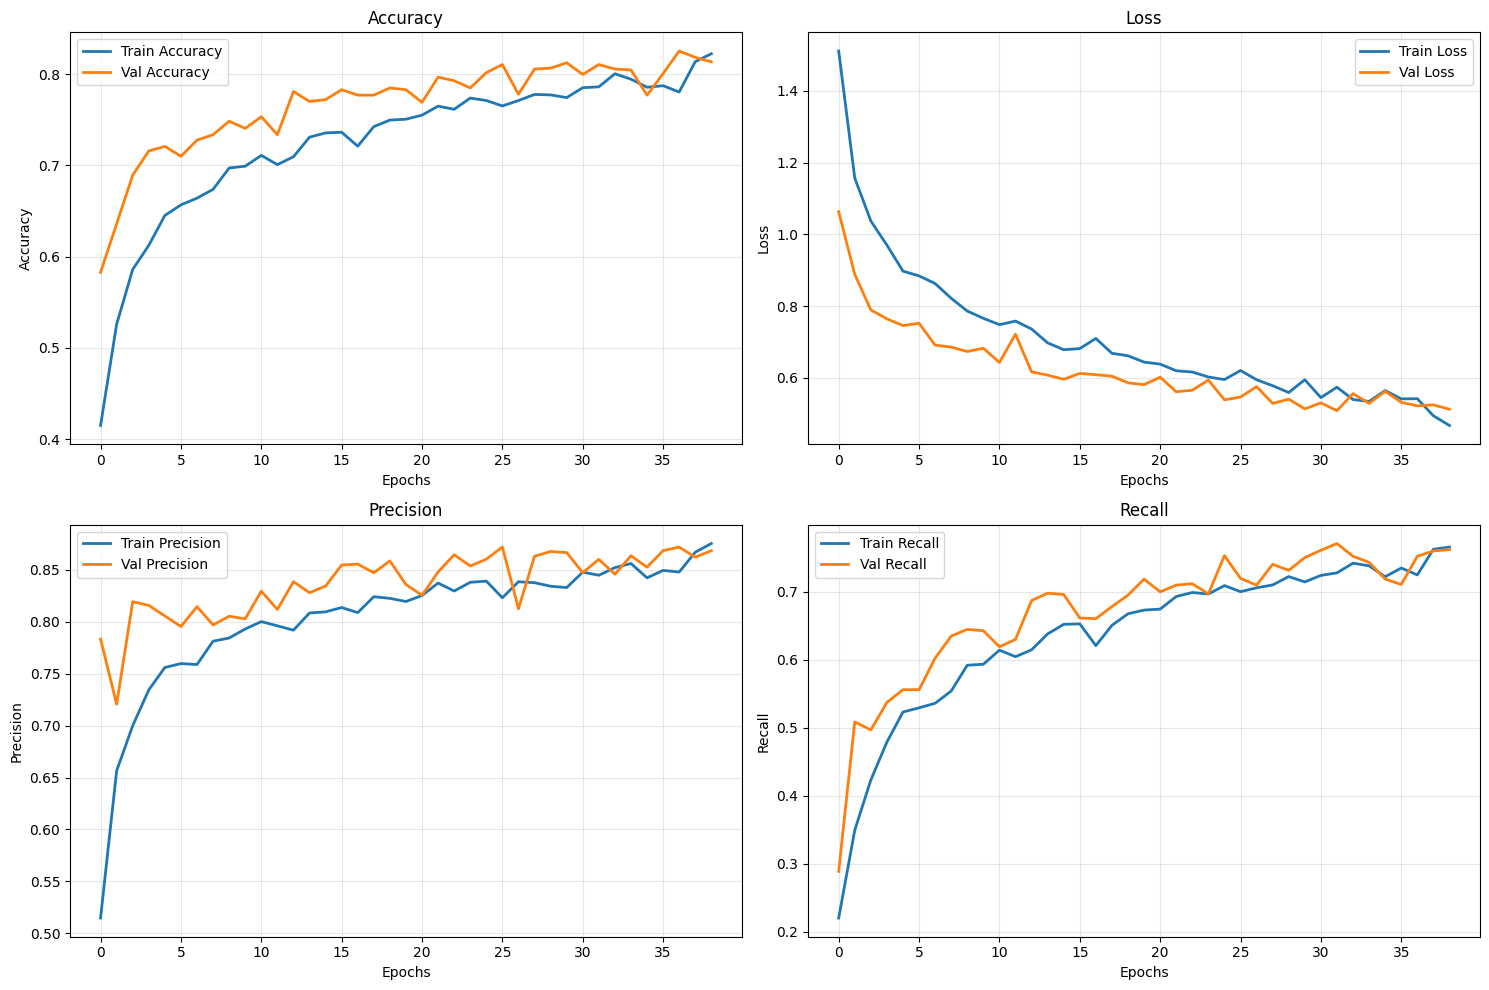

Generating predictions...
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 354ms/step
Confusion Matrix:
[[125  25   1   1  11   6]
 [ 27 116   0   3  21   2]
 [  0   0 168   0   0   1]
 [  1   4   0 152   1  11]
 [ 19  21   1   0 125   3]
 [ 19   6   1   4   3 136]]
Classification Report:
              precision    recall  f1-score   support

         ACK     0.6545    0.7396    0.6944       169
         BCC     0.6744    0.6864    0.6804       169
         MEL     0.9825    0.9941    0.9882       169
         NEV     0.9500    0.8994    0.9240       169
         SCC     0.7764    0.7396    0.7576       169
         SEK     0.8553    0.8047    0.8293       169

    accuracy                         0.8107      1014
   macro avg     0.8155    0.8107    0.8123      1014
weighted avg     0.8155    0.8107    0.8123      1014



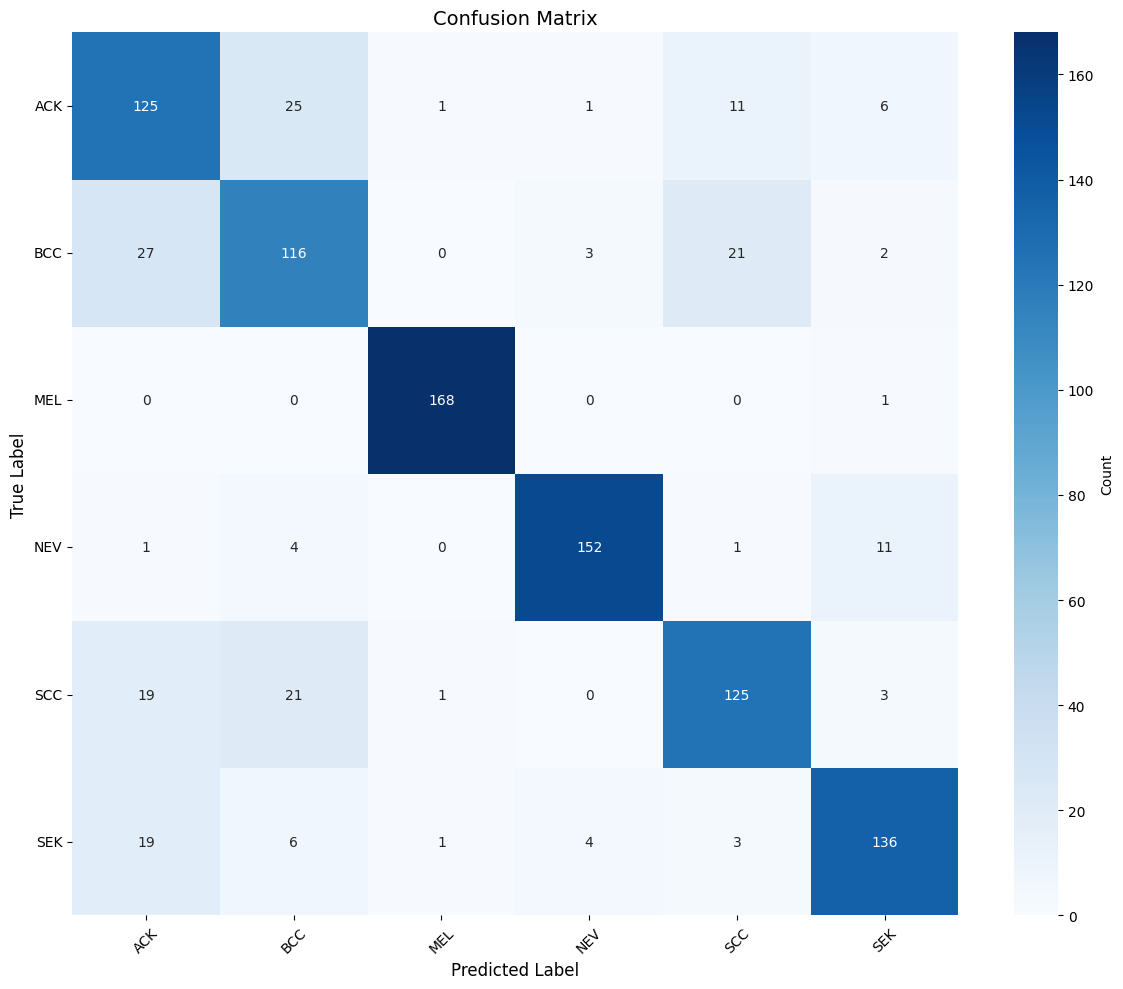

Model saved to: /content/drive/MyDrive/New_Dissertation_Models_and_Code/enhanced_medical_dataset_resnet50_with_saliency.keras
Training history saved to: /content/drive/MyDrive/New_Dissertation_Models_and_Code/training_history.json
Label encoder saved to: /content/drive/MyDrive/New_Dissertation_Models_and_Code/label_encoder.pkl


In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
import json

# Paths to dataset and labels
dataset1_path = '/content/drive/MyDrive/Dissertation'
metadata_csv_path = '/content/drive/MyDrive/metadata.csv'

# Load labels
metadata_df = pd.read_csv(metadata_csv_path)

# Image preprocessing function
def preprocess_image(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"Could not load image: {image_path}")
        img = cv2.resize(img, (224, 224))
        img = preprocess_input(img)
        return img
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Load images and labels with error handling
images = []
labels = []

print("Loading and preprocessing images...")
for index, row in tqdm(metadata_df.iterrows(), total=len(metadata_df)):
    image_path = os.path.join(dataset1_path, row['img_id'])
    if os.path.exists(image_path):
        img = preprocess_image(image_path)
        if img is not None:  # Only add valid images
            images.append(img)
            labels.append(row['diagnostic'])

print(f"Successfully loaded {len(images)} images out of {len(metadata_df)} total")

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Check the unique labels
unique_labels = np.unique(labels)
print(f"Unique encoded labels: {unique_labels}")
print(f"Class names: {label_encoder.classes_}")

# Number of classes
num_classes = len(unique_labels)

# Apply SMOTE with better memory handling
print("Applying SMOTE...")
nsamples, nx, ny, nz = images.shape
print(f"Original data shape: {images.shape}")

# Use SMOTE with sampling strategy to avoid excessive generation
smote = SMOTE(random_state=42, k_neighbors=min(5, len(images)-1))
images_2d = images.reshape((nsamples, nx*ny*nz))
images_smote, labels_smote = smote.fit_resample(images_2d, labels)
images_smote = images_smote.reshape((images_smote.shape[0], nx, ny, nz))

print(f"After SMOTE: {images_smote.shape}")

# Convert labels to categorical
labels_smote = to_categorical(labels_smote, num_classes=num_classes)

# Split with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    images_smote, labels_smote,
    test_size=0.2,
    random_state=42,
    stratify=np.argmax(labels_smote, axis=1)
)

# Define the baseline model
def build_model(input_shape=(224, 224, 3), num_classes=6):
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False

    inputs = Input(input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=output)
    return model

# Build baseline model for saliency generation
print("Building baseline model for saliency generation...")
baseline_model = build_model(num_classes=num_classes)
baseline_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Quick training of baseline model (few epochs just to generate meaningful gradients)
print("Quick training baseline model for saliency...")
baseline_model.fit(X_train, y_train,
                  validation_data=(X_test, y_test),
                  epochs=5,
                  batch_size=32,
                  verbose=1)

# Improved saliency map generation with error handling
def generate_saliency_map(image, model, class_index):
    try:
        image = tf.convert_to_tensor(image)
        image = tf.cast(image, tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(image)
            predictions = model(image)
            if class_index >= predictions.shape[1]:
                class_index = tf.argmax(predictions[0])  # Use predicted class if invalid
            loss = predictions[:, class_index]

        grads = tape.gradient(loss, image)
        if grads is not None:
            saliency = tf.reduce_max(tf.abs(grads), axis=-1)
            # Avoid division by zero
            min_val = tf.reduce_min(saliency)
            max_val = tf.reduce_max(saliency)
            if max_val > min_val:
                saliency = (saliency - min_val) / (max_val - min_val)
            else:
                saliency = tf.zeros_like(saliency)
            return saliency[0].numpy()
        else:
            return np.zeros(image.shape[1:3])
    except Exception as e:
        print(f"Error generating saliency map: {e}")
        return np.zeros(image.shape[1:3])

# Create saliency-augmented images with better memory management
def create_saliency_augmented_images(images, labels, model, batch_size=32):
    augmented_images = []

    print("Generating saliency-augmented images...")
    for i in tqdm(range(0, len(images), batch_size)):
        batch_end = min(i + batch_size, len(images))
        batch_images = images[i:batch_end]
        batch_labels = labels[i:batch_end]

        batch_augmented = []
        for j, (img, label) in enumerate(zip(batch_images, batch_labels)):
            saliency_map = generate_saliency_map(img[np.newaxis, ...], model, np.argmax(label))
            saliency_map = cv2.resize(saliency_map, (224, 224))
            saliency_map = np.expand_dims(saliency_map, axis=-1)
            saliency_map = np.repeat(saliency_map, 3, axis=-1)
            augmented_image = np.concatenate((img, saliency_map), axis=-1)
            batch_augmented.append(augmented_image)

        augmented_images.extend(batch_augmented)

        # Memory cleanup
        if i % (batch_size * 10) == 0:
            tf.keras.backend.clear_session()

    return np.array(augmented_images), labels

# Create saliency-augmented images
X_train_augmented, y_train_augmented = create_saliency_augmented_images(X_train, y_train, baseline_model)
X_test_augmented, y_test_augmented = create_saliency_augmented_images(X_test, y_test, baseline_model)

# Clear baseline model to free memory
del baseline_model
tf.keras.backend.clear_session()

# Enhanced model with saliency
def build_model_with_saliency(input_shape=(224, 224, 6), num_classes=6):
    # Create two separate ResNet50 models with unique names
    base_model_img = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), name='resnet50_image')
    base_model_sal = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), name='resnet50_saliency')

    base_model_img.trainable = False
    base_model_sal.trainable = False

    inputs = Input(input_shape)
    image_input = inputs[:, :, :, :3]
    saliency_input = inputs[:, :, :, 3:]

    # Process image and saliency separately
    x = base_model_img(image_input, training=False)
    x = GlobalAveragePooling2D(name='gap_image')(x)

    y = base_model_sal(saliency_input, training=False)
    y = GlobalAveragePooling2D(name='gap_saliency')(y)

    # Combine features
    combined = concatenate([x, y], name='feature_concat')
    combined = Dense(512, activation='relu', name='dense_512')(combined)  # Increased capacity
    combined = Dropout(0.5, name='dropout_1')(combined)
    combined = Dense(256, activation='relu', name='dense_256')(combined)
    combined = Dropout(0.3, name='dropout_2')(combined)
    output = Dense(num_classes, activation='softmax', name='predictions')(combined)

    model = Model(inputs=inputs, outputs=output)
    return model

# Build final model
model_with_saliency = build_model_with_saliency(num_classes=num_classes)
model_with_saliency.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

# Improved data augmentation (less aggressive for medical images)
datagen = ImageDataGenerator(
    rotation_range=20,        # Reduced from 40
    width_shift_range=0.1,    # Reduced from 0.2
    height_shift_range=0.1,   # Reduced from 0.2
    shear_range=0.1,          # Reduced from 0.2
    zoom_range=0.1,           # Reduced from 0.2
    horizontal_flip=True,
    fill_mode='nearest'
)

# Enhanced callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Increased patience
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Less aggressive reduction
    patience=5,  # Increased patience
    min_lr=0.00001,
    verbose=1
)

# Train the model
print("Training the enhanced model...")
history = model_with_saliency.fit(
    datagen.flow(X_train_augmented, y_train_augmented, batch_size=32),
    epochs=50,
    validation_data=(X_test_augmented, y_test_augmented),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
results = model_with_saliency.evaluate(X_test_augmented, y_test_augmented, verbose=1)
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")
print(f"Test AUC: {results[4]:.4f}")

# Enhanced plotting
plt.figure(figsize=(15, 10))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.grid(True, alpha=0.3)

# Loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Val Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.grid(True, alpha=0.3)

# Precision
plt.subplot(2, 2, 3)
plt.plot(history.history['precision'], label='Train Precision', linewidth=2)
plt.plot(history.history['val_precision'], label='Val Precision', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision')
plt.grid(True, alpha=0.3)

# Recall
plt.subplot(2, 2, 4)
plt.plot(history.history['recall'], label='Train Recall', linewidth=2)
plt.plot(history.history['val_recall'], label='Val Recall', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Recall')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Generate predictions and reports
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("Generating predictions...")
y_pred = model_with_saliency.predict(X_test_augmented)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_augmented, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(
    y_true_classes, y_pred_classes,
    target_names=label_encoder.classes_,
    digits=4
)
print("Classification Report:")
print(class_report)

# Enhanced confusion matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix,
           annot=True,
           fmt="d",
           cmap="Blues",
           xticklabels=label_encoder.classes_,
           yticklabels=label_encoder.classes_,
           cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Save model with better organization
drive_path = '/content/drive/MyDrive/New_Dissertation_Models_and_Code'
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

# Save model
model_path = os.path.join(drive_path, 'enhanced_medical_dataset_resnet50_with_saliency.keras')
model_with_saliency.save(model_path)

# Save training history
history_path = os.path.join(drive_path, 'training_history.json')
with open(history_path, 'w') as f:
    # Convert numpy arrays to lists for JSON serialization
    history_dict = {}
    for key, value in history.history.items():
        history_dict[key] = [float(v) for v in value]
    json.dump(history_dict, f, indent=2)

# Save label encoder
import pickle
le_path = os.path.join(drive_path, 'label_encoder.pkl')
with open(le_path, 'wb') as f:
    pickle.dump(label_encoder, f)

print(f"Model saved to: {model_path}")
print(f"Training history saved to: {history_path}")
print(f"Label encoder saved to: {le_path}")

# efficientnet

Num GPUs Available:  1
Loading data with enhanced preprocessing...
Loading and preprocessing images with enhanced method...


100%|██████████| 2298/2298 [01:28<00:00, 26.01it/s]


Applying SMOTE for class balancing...
Unique encoded labels: [0 1 2 3 4 5]
Original dataset size: 2298
After SMOTE dataset size: 5070
Creating directory structure...


100%|██████████| 5070/5070 [00:09<00:00, 531.84it/s]


Created directory structure at /tmp/medical_dataset_balanced
Found 4056 images belonging to 6 classes.
Found 1014 images belonging to 6 classes.
Displaying sample augmented images...


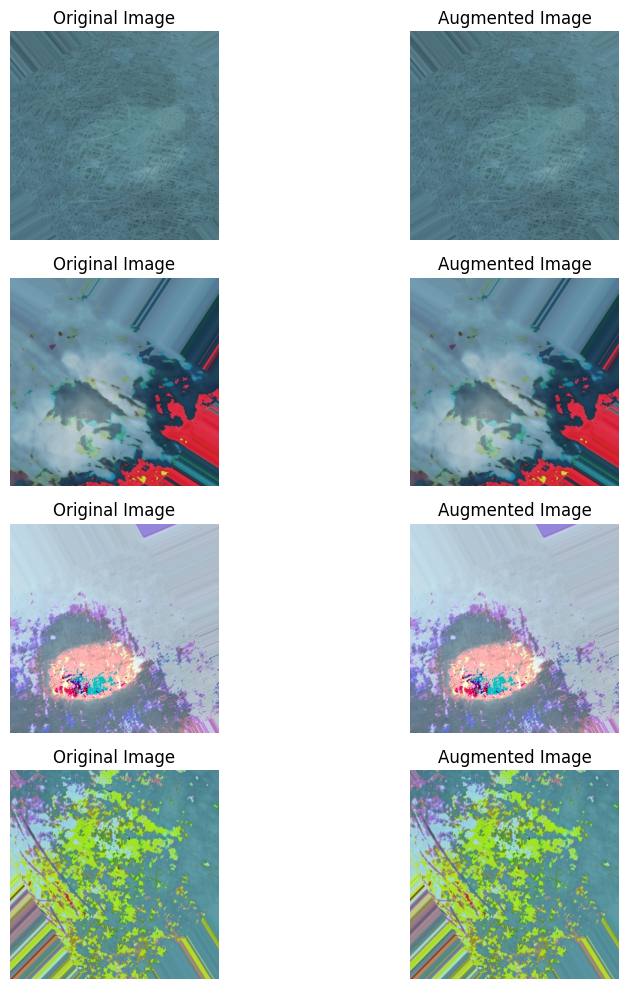

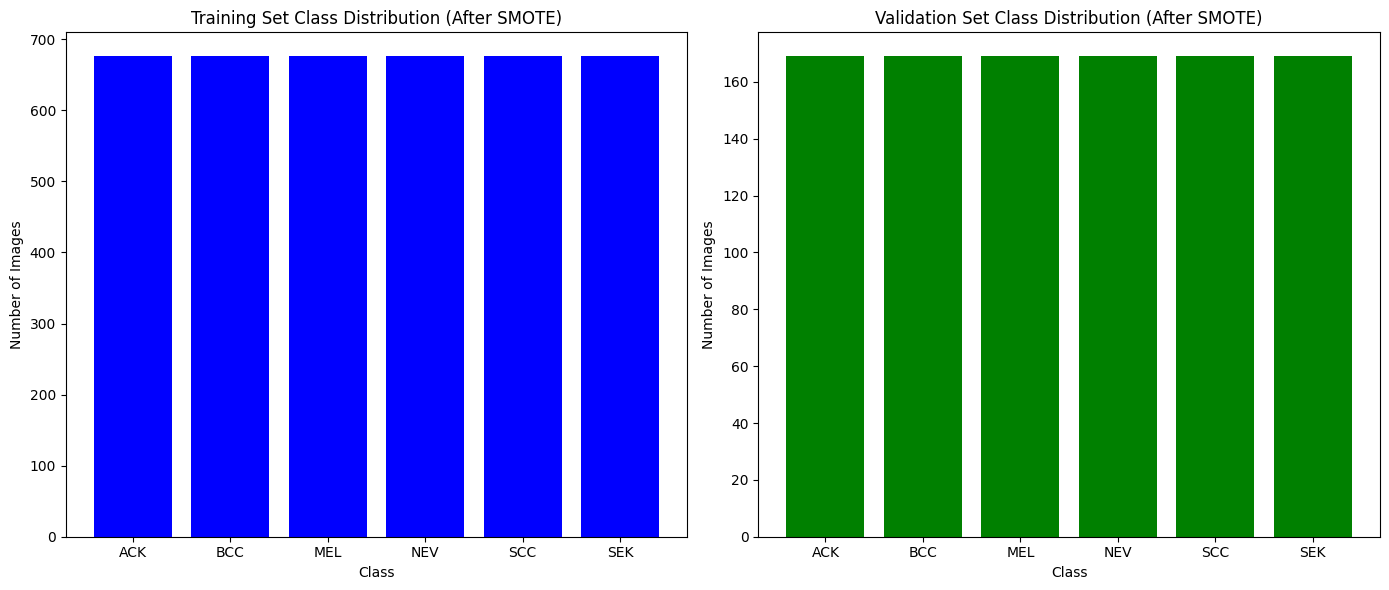

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 380, 380,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 380, 380,  │          0 │ input_layer_9[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 380, 380,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 380, 380,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 381, 381,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 190, 190,  │      1,296 │ stem_conv_pad[0]… │
│                     │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 190, 190,  │        192 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 190, 190,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 190, 190,  │        432 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 190, 190,  │        192 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 190, 190,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 48)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 48)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 48)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 12)  │        588 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 48)  │        624 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 190, 190,  │          0 │ block1a_activati… │
│ (Multiply)          │ 48)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 190, 190,  │      1,152 │ block1a_se_excit

 Total params: 22,897,957 (87.35 MB)

 Trainable params: 22,772,750 (86.87 MB)

 Non-trainable params: 125,207 (489.09 KB)

Starting enhanced training...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.3055 - auc: 0.6600 - loss: 1.6580 - precision: 0.4163 - recall: 0.0235 - val_accuracy: 0.1677 - val_auc: 0.4932 - val_loss: 1.9519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-05
Epoch 2/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 190s 746ms/step - accuracy: 0.6031 - auc: 0.8932 - loss: 1.0339 - precision: 0.7183 - recall: 0.4238 - val_accuracy: 0.2515 - val_auc: 0.6289 - val_loss: 2.0895 - val_precision: 0.2754 - val_recall: 0.2140 - learning_rate: 5.0000e-05
Epoch 3/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 190s 746ms/step - accuracy: 0.7059 - auc: 0.9358 - loss: 0.7976 - precision: 0.7713 - recall: 0.6112 - val_accuracy: 0.5700 - val_auc: 0.8659 - val_loss: 1.2125 - val_precision: 0.6192 - val_recall: 0.5020 - learning_rate: 5.0000e-05
Epoch 4/50
254/254 ━━━━━━━━━━━━━━━━━━━━ 188s 740ms/step - accuracy: 0.7785 - auc: 0.9593 - loss: 0.6262 - precision: 0.8276 - recall: 0.7245 - val_accuracy: 0.6341 - val_auc

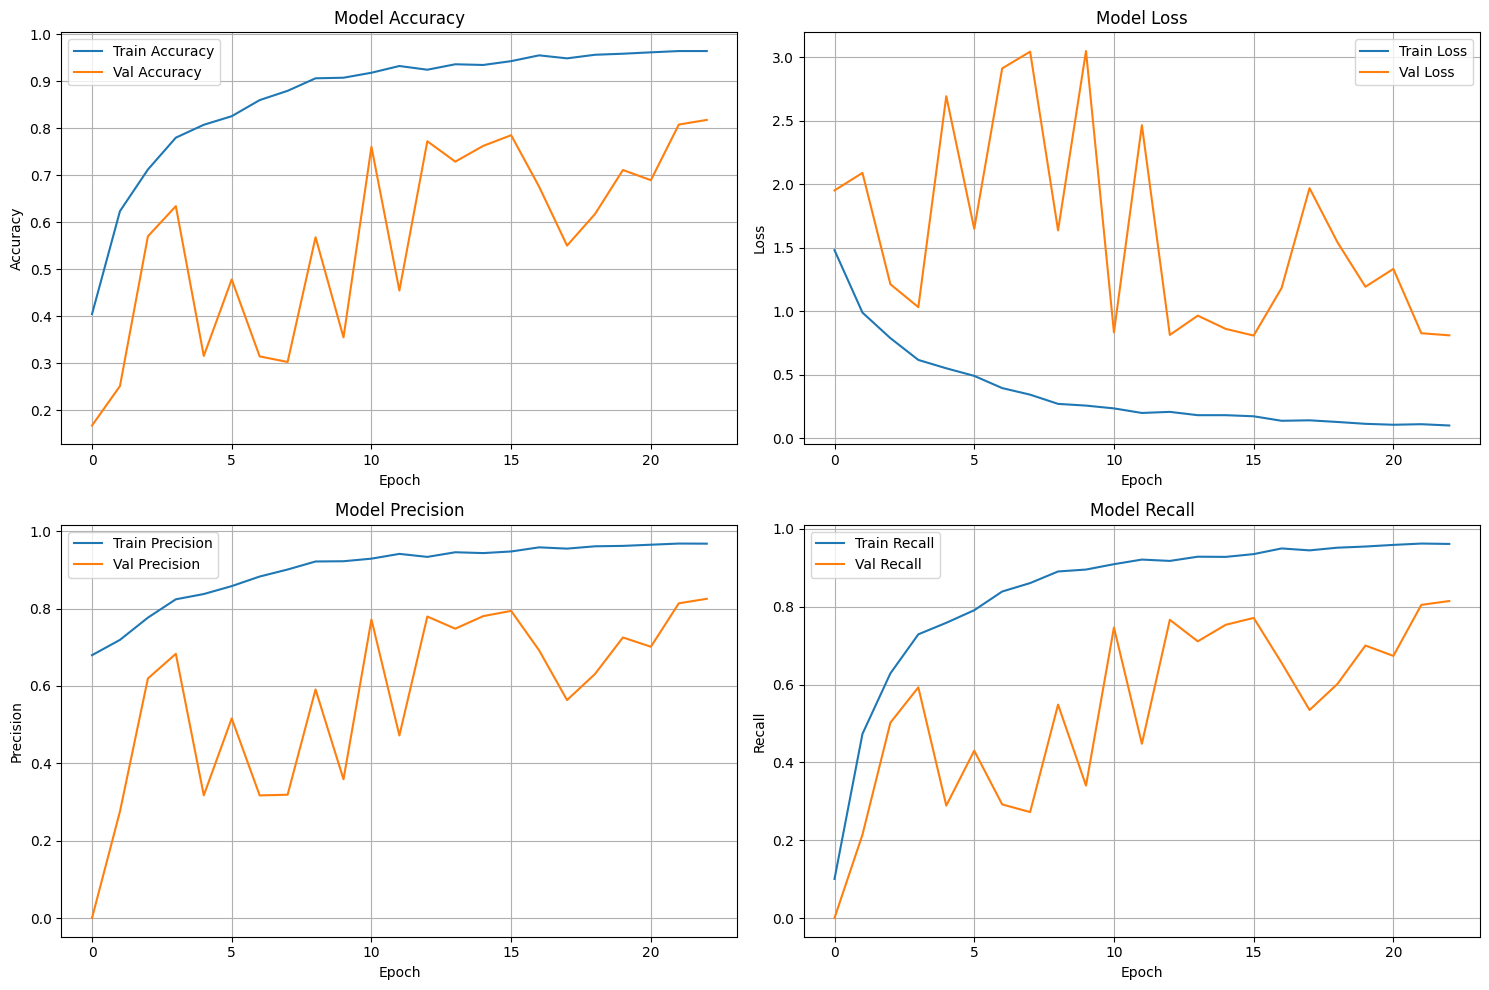


ENHANCED TRAINING RESULTS
Final Training Accuracy: 0.9640
Final Validation Accuracy: 0.8176
Final Training Precision: 0.9677
Final Validation Precision: 0.8252
Final Training Recall: 0.9613
Final Validation Recall: 0.8146
Final Training AUC: 0.9987
Final Validation AUC: 0.9514

Extracting validation data for analysis...
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 452ms/step
Applying t-SNE for feature visualization...


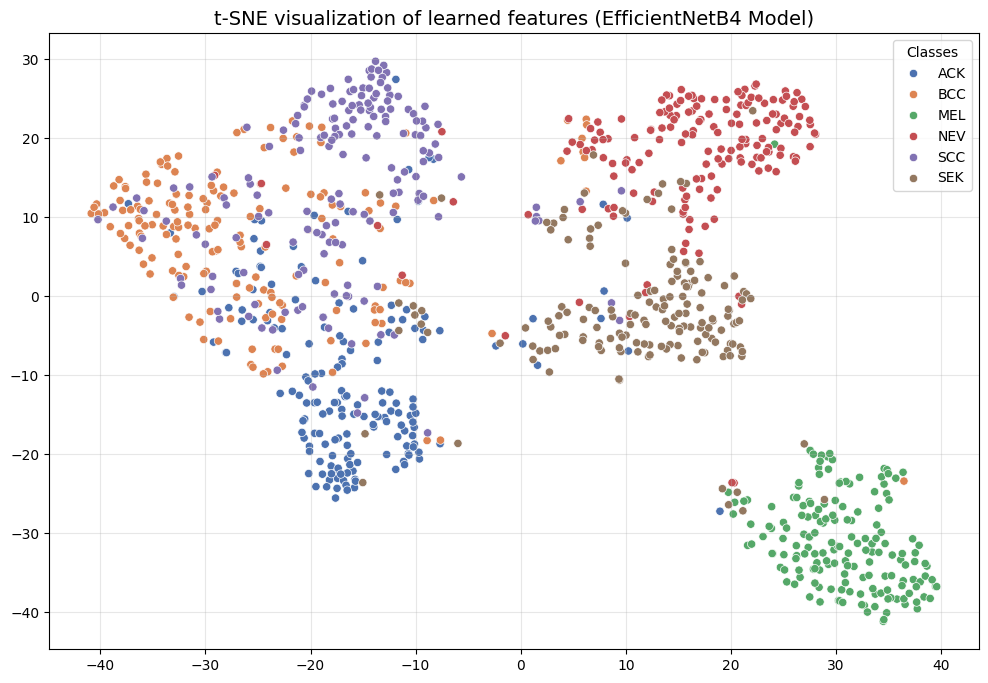

1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step


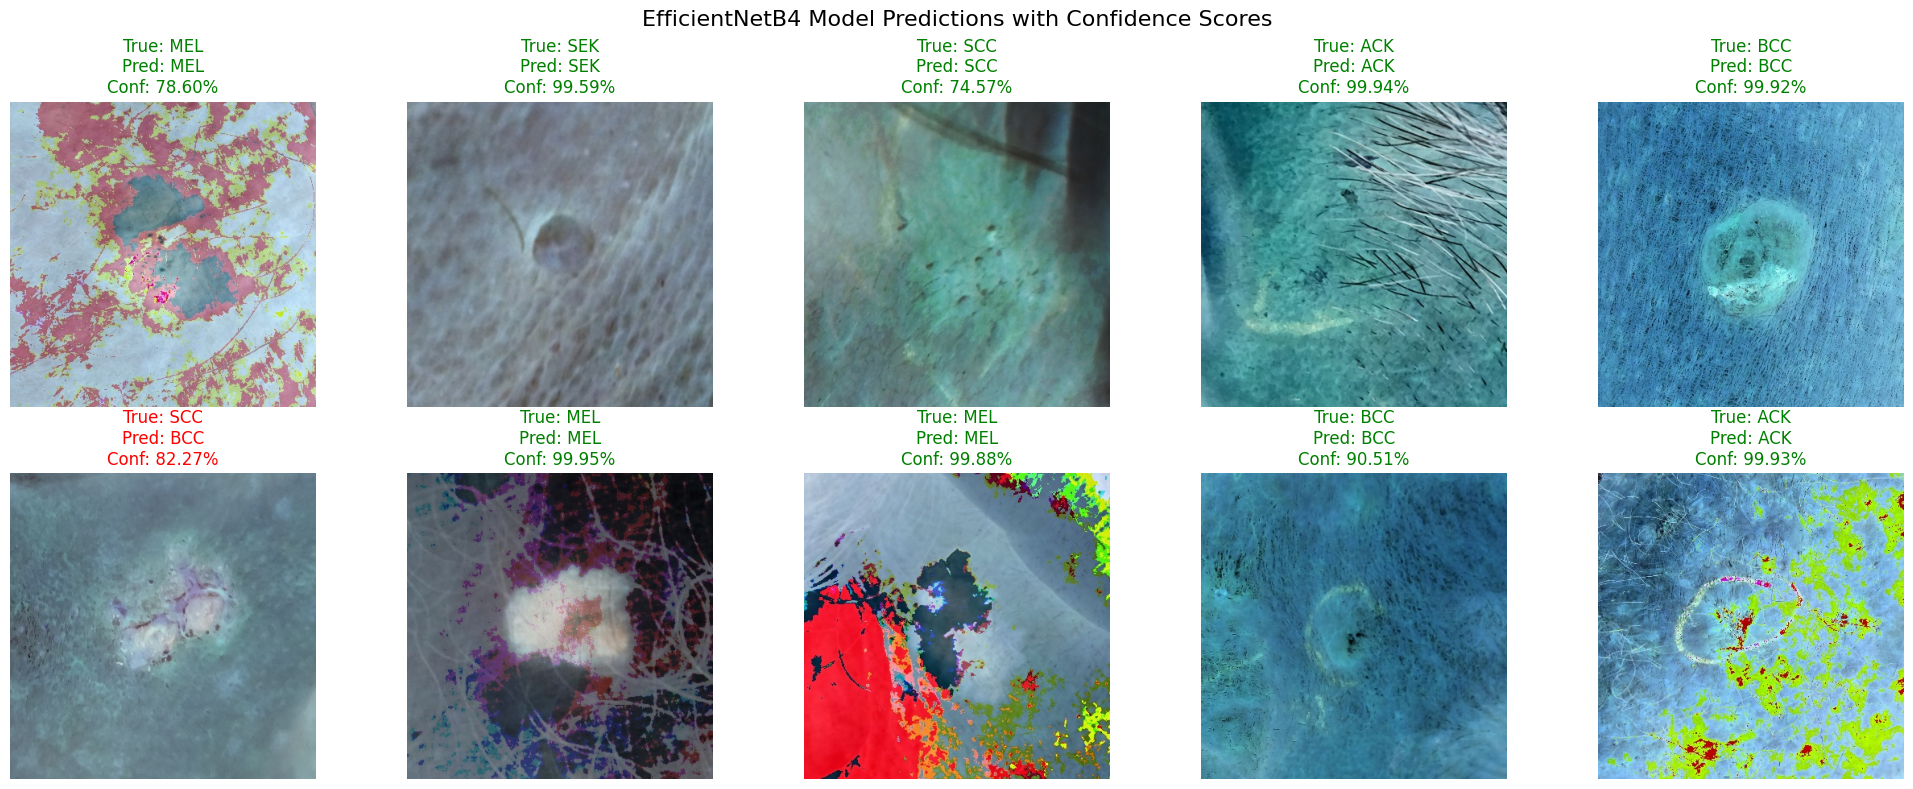


EFFICIENTNETB4 TRAINING COMPLETED SUCCESSFULLY!
Key improvements implemented:
✓ EfficientNetB4 architecture (more efficient than ResNet50)
✓ Enhanced preprocessing with EfficientNet preprocessing
✓ SMOTE for class balancing
✓ Optimal input resolution (380x380 for EfficientNetB4)
✓ Enhanced data augmentation
✓ Additional metrics tracking (Precision, Recall, AUC)
✓ Optimized learning rate and callbacks for EfficientNet
✓ More sophisticated model architecture
✓ Reduced batch size for larger input images


In [ ]:
# Imports
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import joblib
from imblearn.over_sampling import SMOTE

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Paths
dataset_path = '/content/drive/MyDrive/Dissertation'
metadata_csv_path = '/content/drive/MyDrive/metadata.csv'

# Load labels
metadata_df = pd.read_csv(metadata_csv_path)

# Enhanced settings (EfficientNetB4 optimal input size is 380x380)
img_height, img_width = 380, 380
batch_size = 16  # Reduced batch size due to larger input size

# Enhanced image preprocessing function for EfficientNetB4
def preprocess_image(image_path):
    """Enhanced preprocessing with EfficientNetB4 preprocessing"""
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, (img_height, img_width))  # Resize to 380x380 for EfficientNetB4
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = preprocess_input(img)  # Use EfficientNetB4's preprocessing
    return img

def random_contrast(image):
    """Enhanced contrast adjustment"""
    contrast_factor = tf.random.uniform([], 0.5, 1.5)
    image = tf.image.adjust_contrast(image, contrast_factor)
    return image

# Enhanced data loading with better preprocessing
def load_data_from_metadata(metadata, base_path):
    images, labels = [], []
    print("Loading and preprocessing images with enhanced method...")

    for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
        img_path = os.path.join(base_path, row['img_id'])
        if os.path.exists(img_path):
            img = preprocess_image(img_path)
            if img is not None:
                images.append(img)
                labels.append(row['diagnostic'])

    return np.array(images), np.array(labels)

# Load data with enhanced preprocessing
print("Loading data with enhanced preprocessing...")
images, labels = load_data_from_metadata(metadata_df, dataset_path)

# Apply SMOTE for class balancing (from first file)
print("Applying SMOTE for class balancing...")
# Encode labels first
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Check the unique labels
unique_labels = np.unique(labels_encoded)
print(f"Unique encoded labels: {unique_labels}")
num_classes = len(unique_labels)

# Reshape images for SMOTE
nsamples, nx, ny, nz = images.shape
images_2d = images.reshape((nsamples, nx*ny*nz))

# Apply SMOTE
smote = SMOTE(random_state=42)
images_smote, labels_smote = smote.fit_resample(images_2d, labels_encoded)

# Reshape images back to original shape
images_smote = images_smote.reshape((images_smote.shape[0], nx, ny, nz))

# Convert back to original label format for directory creation
labels_original = label_encoder.inverse_transform(labels_smote)

print(f"Original dataset size: {len(images)}")
print(f"After SMOTE dataset size: {len(images_smote)}")

# Create directory structure for ImageDataGenerator
def create_directory_structure(images, labels, base_output_path):
    """Create directory structure compatible with flow_from_directory"""
    if not os.path.exists(base_output_path):
        os.makedirs(base_output_path)

    # Get unique classes
    unique_classes = np.unique(labels)

    # Create class directories
    for class_name in unique_classes:
        class_dir = os.path.join(base_output_path, str(class_name))
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

    # Save images to appropriate directories
    print("Creating directory structure...")
    for i, (image, label) in enumerate(tqdm(zip(images, labels), total=len(images))):
        class_dir = os.path.join(base_output_path, str(label))
        # Convert back from EfficientNet preprocessing for saving
        # EfficientNet preprocessing normalizes to [0,1] range, so we need to reverse it
        image_save = image.copy()
        # Reverse EfficientNet preprocessing (scale back to [0,255])
        image_save = (image_save * 255.0).astype(np.uint8)
        image_save = cv2.cvtColor(image_save, cv2.COLOR_RGB2BGR)  # Convert back to BGR for OpenCV
        cv2.imwrite(os.path.join(class_dir, f'image_{i}.jpg'), image_save)

    print(f"Created directory structure at {base_output_path}")
    return base_output_path

# Create directory structure with SMOTE-balanced data
base_dir = '/tmp/medical_dataset_balanced'
base_dir = create_directory_structure(images_smote, labels_original, base_dir)

# Enhanced data augmentation (combining techniques from both files)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Enhanced augmentation parameters from first file
    rotation_range=40,        # Increased from 30
    width_shift_range=0.2,    # Increased from 0.1
    height_shift_range=0.2,   # Increased from 0.1
    shear_range=0.2,          # Increased from 0.1
    zoom_range=0.2,           # Increased from 0.1
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=random_contrast
)

# Validation data generator (no augmentation for validation)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

def display_images(generator, num_images=4):
    """Display sample images from generator"""
    fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 10))
    axs = axs.flatten()

    for i in range(num_images):
        img, label = next(generator)
        axs[2*i].imshow(img[0])
        axs[2*i].set_title('Original Image')
        axs[2*i].axis('off')

        axs[2*i+1].imshow(img[0])
        axs[2*i+1].set_title('Augmented Image')
        axs[2*i+1].axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
print("Displaying sample augmented images...")
display_images(train_generator)

# Get class information
train_class_indices = train_generator.class_indices
class_labels = list(train_class_indices.keys())

# Count the number of images per class
train_counts = np.zeros(len(class_labels))
validation_counts = np.zeros(len(class_labels))

for i, label in enumerate(train_generator.classes):
    train_counts[label] += 1

for i, label in enumerate(validation_generator.classes):
    validation_counts[label] += 1

# Plot the distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(class_labels, train_counts, color='blue')
ax[0].set_title('Training Set Class Distribution (After SMOTE)')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Images')

ax[1].bar(class_labels, validation_counts, color='green')
ax[1].set_title('Validation Set Class Distribution (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

# Enhanced model architecture with EfficientNetB4
NUM_CLASSES = len(class_labels)

# Load the EfficientNetB4 model with optimal input size
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(380, 380, 3))

# Enhanced architecture optimized for EfficientNetB4
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1792, activation='relu')(x)  # Match EfficientNetB4's feature dimension
x = Dropout(0.4)(x)
x = Dense(896, activation='relu')(x)   # Proportional reduction
x = Dropout(0.3)(x)
x = Dense(448, activation='relu')(x)   # Additional layer for better feature learning
x = Dropout(0.2)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Enhanced fine-tuning: unfreeze top layers for EfficientNetB4
# EfficientNetB4 has different architecture, so we'll unfreeze the last 20% of layers
total_layers = len(base_model.layers)
unfreeze_from = int(total_layers * 0.8)  # Unfreeze last 20% of layers

for layer in base_model.layers[unfreeze_from:]:
    layer.trainable = True

model.summary()

# Enhanced compilation with lower learning rate for EfficientNetB4
model.compile(
    optimizer=Adam(learning_rate=0.00005),  # Lower learning rate for EfficientNet
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Enhanced callbacks optimized for EfficientNetB4
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)  # Increased patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=0.000001)  # More conservative LR reduction

# Train the model with enhanced callbacks
print("Starting enhanced training...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('enhanced_medical_efficientb4_model.keras')

# Save to drive as well
drive_path = '/content/drive/MyDrive/New_Dissertation_Models_and_Code'
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

model.save(os.path.join(drive_path, 'enhanced_medical_efficientb4.keras'))
model.save(os.path.join(drive_path, 'enhanced_medical_efficientb4.h5'))

# Enhanced plotting function with additional metrics
def plot_training_history(history):
    """Plot comprehensive training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    if 'precision' in history.history:
        axes[1, 0].plot(history.history['precision'], label='Train Precision')
        axes[1, 0].plot(history.history['val_precision'], label='Val Precision')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].legend()
        axes[1, 0].grid(True)

    # Recall
    if 'recall' in history.history:
        axes[1, 1].plot(history.history['recall'], label='Train Recall')
        axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].legend()
        axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the enhanced training history
plot_training_history(history)

# Print comprehensive results
print("\n" + "="*50)
print("ENHANCED TRAINING RESULTS")
print("="*50)
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

if 'precision' in history.history:
    print(f"Final Training Precision: {history.history['precision'][-1]:.4f}")
    print(f"Final Validation Precision: {history.history['val_precision'][-1]:.4f}")

if 'recall' in history.history:
    print(f"Final Training Recall: {history.history['recall'][-1]:.4f}")
    print(f"Final Validation Recall: {history.history['val_recall'][-1]:.4f}")

if 'auc' in history.history:
    print(f"Final Training AUC: {history.history['auc'][-1]:.4f}")
    print(f"Final Validation AUC: {history.history['val_auc'][-1]:.4f}")

# Extract validation data for t-SNE analysis
print("\nExtracting validation data for analysis...")
validation_generator.reset()
X_val, y_val = next(validation_generator)
for i in range(1, validation_generator.samples // validation_generator.batch_size):
    img, label = next(validation_generator)
    X_val = np.append(X_val, img, axis=0)
    y_val = np.append(y_val, label, axis=0)

# Extract features from the second-to-last layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_extractor.predict(X_val)

# Apply t-SNE
print("Applying t-SNE for feature visualization...")
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Map numeric labels to class names
class_indices = validation_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
y_val_labels = np.argmax(y_val, axis=1)
y_val_class_names = [class_names[label] for label in y_val_labels]

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y_val_class_names, palette='deep')
plt.title('t-SNE visualization of learned features (EfficientNetB4 Model)', fontsize=14)
plt.legend(title='Classes')
plt.grid(True, alpha=0.3)
plt.show()

def plot_predictions_with_confidence(model, validation_generator, num_images=10):
    """Enhanced prediction visualization"""
    class_indices = validation_generator.class_indices
    class_names = list(class_indices.keys())

    # Extract validation data
    validation_generator.reset()
    X_val, y_val = next(validation_generator)
    for i in range(1, validation_generator.samples // validation_generator.batch_size):
        img, label = next(validation_generator)
        X_val = np.append(X_val, img, axis=0)
        y_val = np.append(y_val, label, axis=0)

    # Select random indices
    indices = random.sample(range(len(X_val)), num_images)
    selected_images = X_val[indices]
    selected_labels = y_val[indices]

    # Make predictions
    predictions = model.predict(selected_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Plot results
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for i, idx in enumerate(indices):
        axes[i].imshow(selected_images[i])
        axes[i].axis('off')

        true_label = class_names[np.argmax(selected_labels[i])]
        pred_label = class_names[predicted_classes[i]]
        confidence = predictions[i][predicted_classes[i]] * 100

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(
            f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}%',
            color=color, fontsize=12
        )

    plt.suptitle('EfficientNetB4 Model Predictions with Confidence Scores', fontsize=16)
    plt.tight_layout()
    plt.show()

# Display enhanced predictions
plot_predictions_with_confidence(model, validation_generator, num_images=10)

print("\n" + "="*50)
print("EFFICIENTNETB4 TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print("Key improvements implemented:")
print("✓ EfficientNetB4 architecture (more efficient than ResNet50)")
print("✓ Enhanced preprocessing with EfficientNet preprocessing")
print("✓ SMOTE for class balancing")
print("✓ Optimal input resolution (380x380 for EfficientNetB4)")
print("✓ Enhanced data augmentation")
print("✓ Additional metrics tracking (Precision, Recall, AUC)")
print("✓ Optimized learning rate and callbacks for EfficientNet")
print("✓ More sophisticated model architecture")
print("✓ Reduced batch size for larger input images")
print("="*50)

# Vgg16

Num GPUs Available:  1
Loading data with enhanced preprocessing...
Loading and preprocessing images with VGG16 method...


100%|██████████| 2298/2298 [01:28<00:00, 26.02it/s]


Applying SMOTE for class balancing...
Unique encoded labels: [0 1 2 3 4 5]
Original dataset size: 2298
After SMOTE dataset size: 5070
Creating directory structure...


100%|██████████| 5070/5070 [00:08<00:00, 592.77it/s]


Created directory structure at /tmp/medical_dataset_balanced
Found 4056 images belonging to 6 classes.
Found 1014 images belonging to 6 classes.
Displaying sample augmented images...


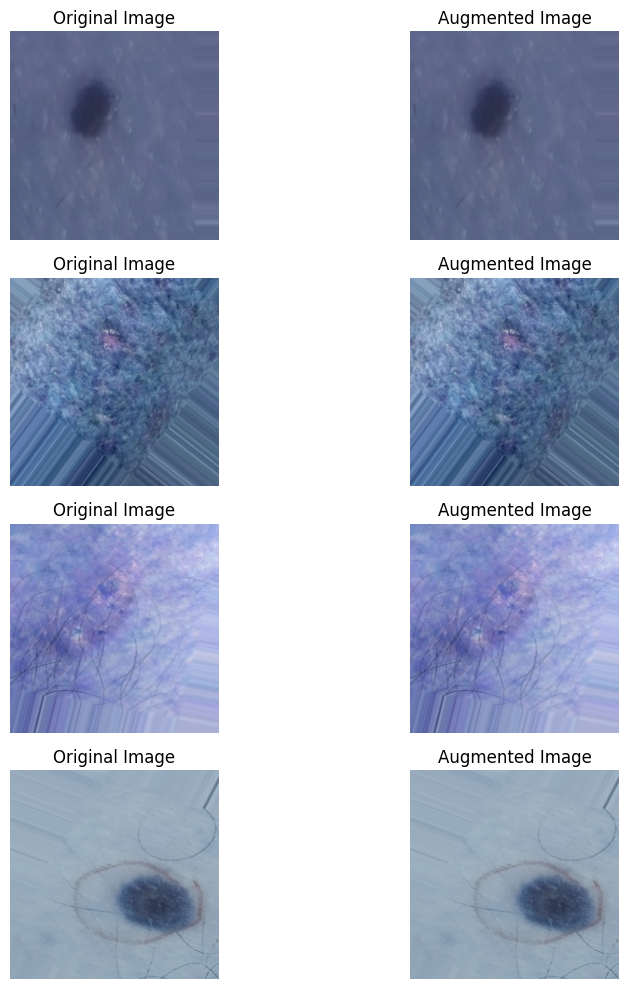

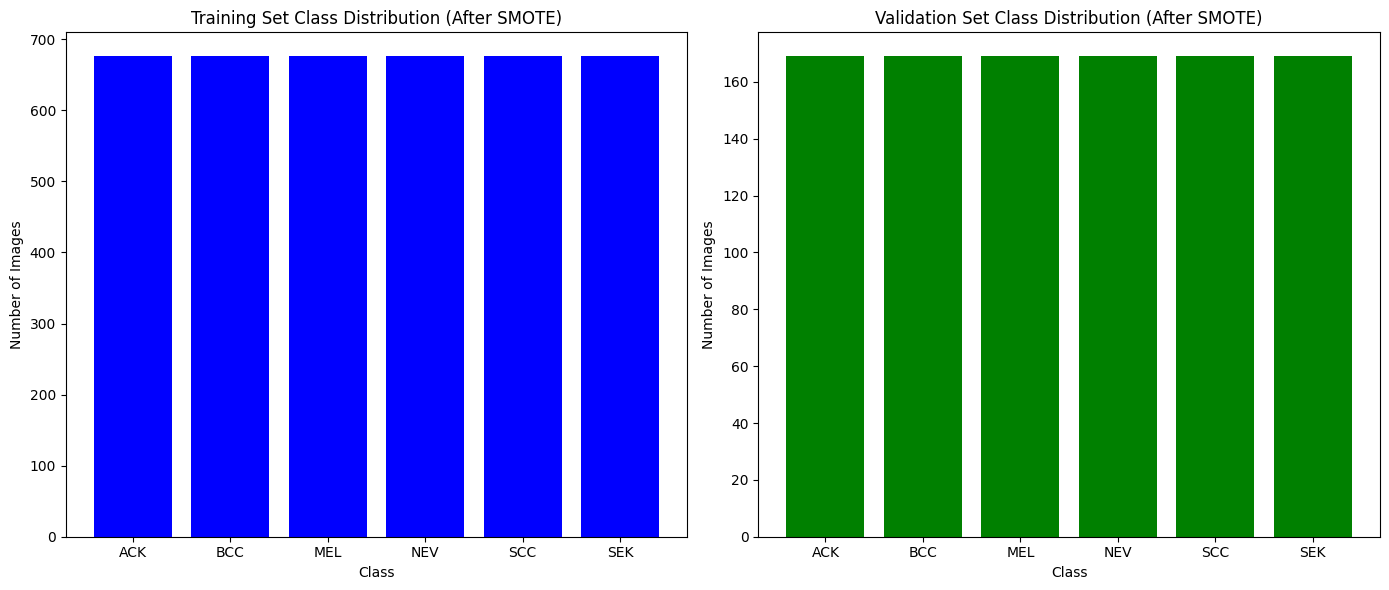

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     4,195,32

 Total params: 138,462,022 (528.19 MB)

 Trainable params: 136,726,534 (521.57 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

Starting VGG16 training...
Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 113s 739ms/step - accuracy: 0.1940 - auc: 0.5222 - loss: 1.8691 - precision: 0.2242 - recall: 0.0105 - val_accuracy: 0.2426 - val_auc: 0.5886 - val_loss: 1.7670 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 67s 527ms/step - accuracy: 0.2288 - auc: 0.6043 - loss: 1.7555 - precision: 0.2799 - recall: 0.0031 - val_accuracy: 0.2712 - val_auc: 0.6447 - val_loss: 1.7296 - val_precision: 0.4545 - val_recall: 0.0197 - learning_rate: 1.0000e-04
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 67s 525ms/step - accuracy: 0.2756 - auc: 0.6597 - loss: 1.7035 - precision: 0.5249 - recall: 0.0338 - val_accuracy: 0.3156 - val_auc: 0.7500 - val_loss: 1.5272 - val_precision: 0.4265 - val_recall: 0.0286 - learning_rate: 1.0000e-04
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 67s 524ms/step - accuracy: 0.3216 - auc: 0.7482 - loss: 1.5113 - precision: 0.4151 - recall: 0.0332 - val

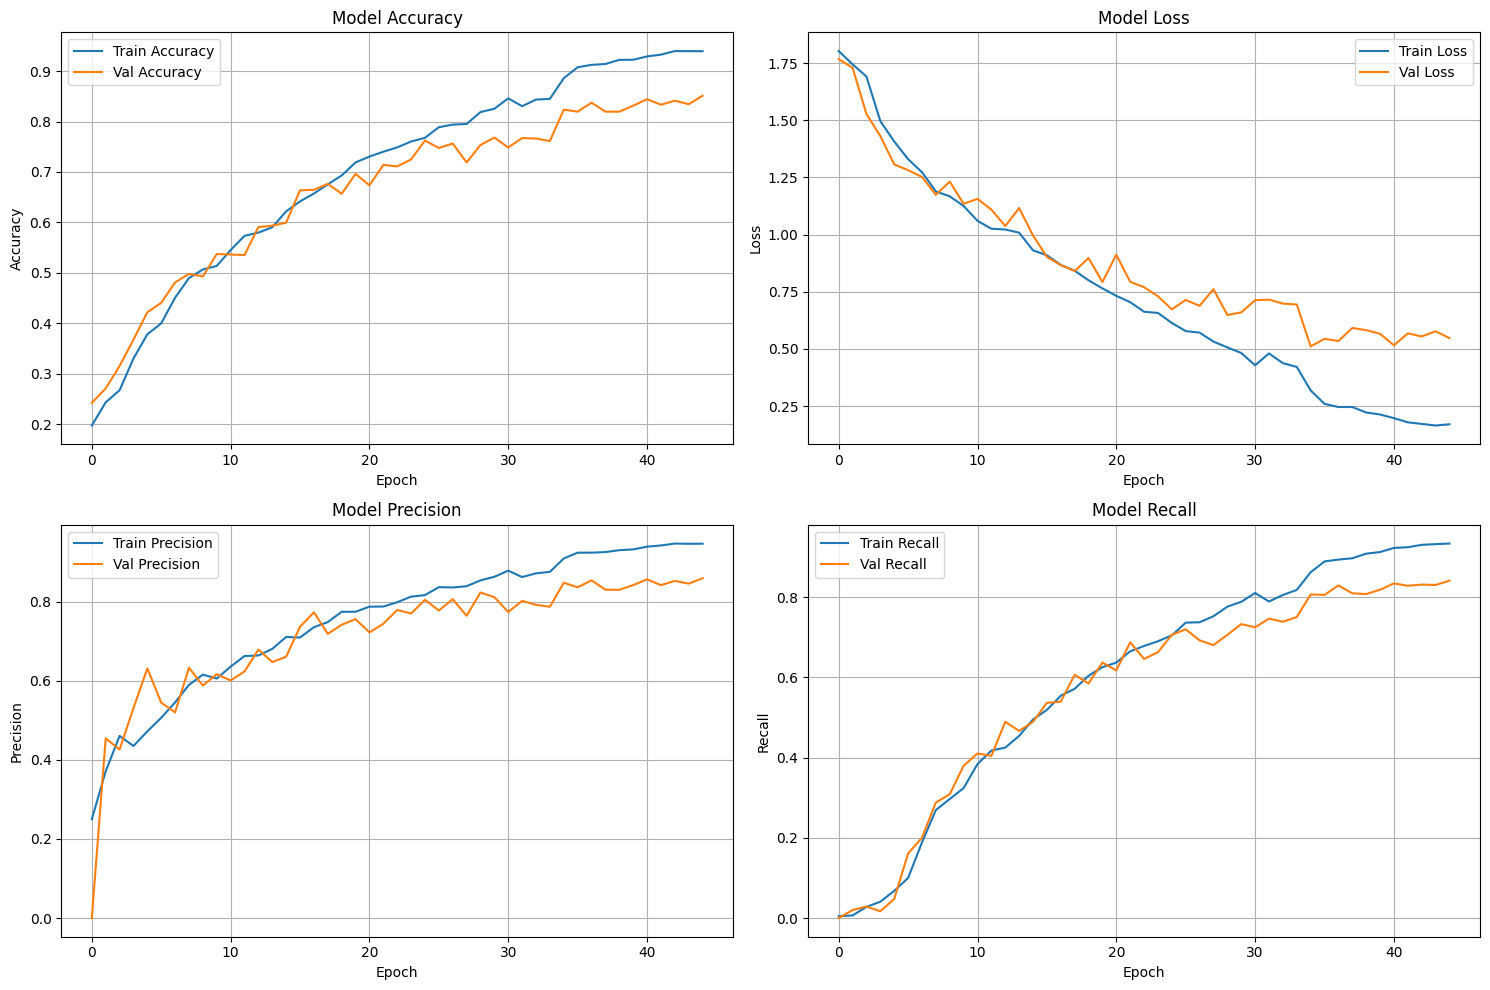


VGG16 TRAINING RESULTS
Final Training Accuracy: 0.9393
Final Validation Accuracy: 0.8511
Final Training Precision: 0.9475
Final Validation Precision: 0.8599
Final Training Recall: 0.9337
Final Validation Recall: 0.8412
Final Training AUC: 0.9963
Final Validation AUC: 0.9732

Extracting validation data for analysis...
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step
Applying t-SNE for feature visualization...


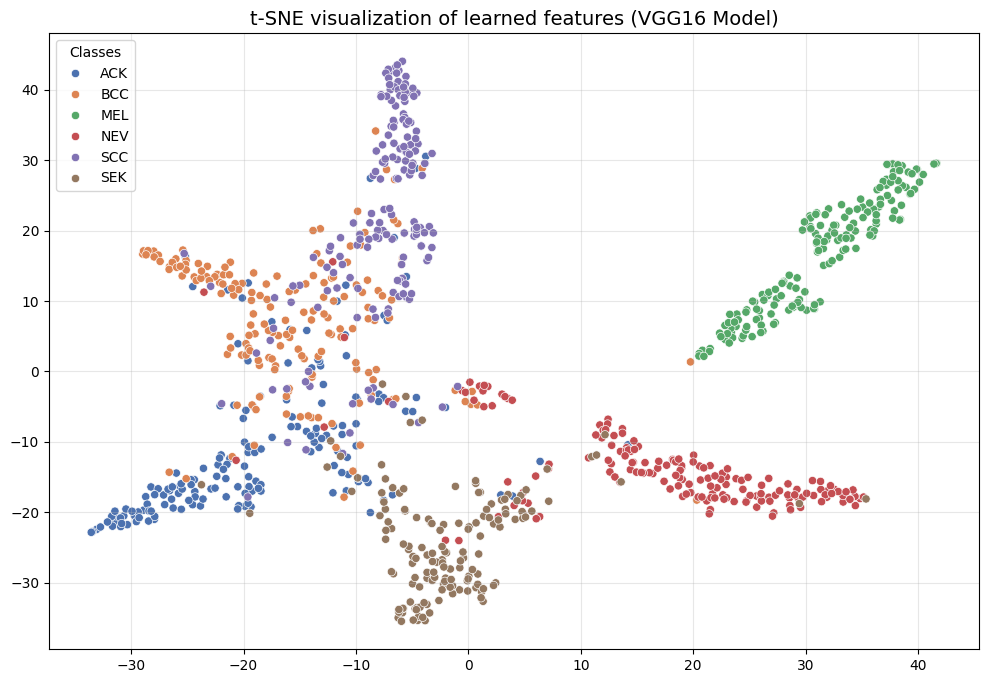

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


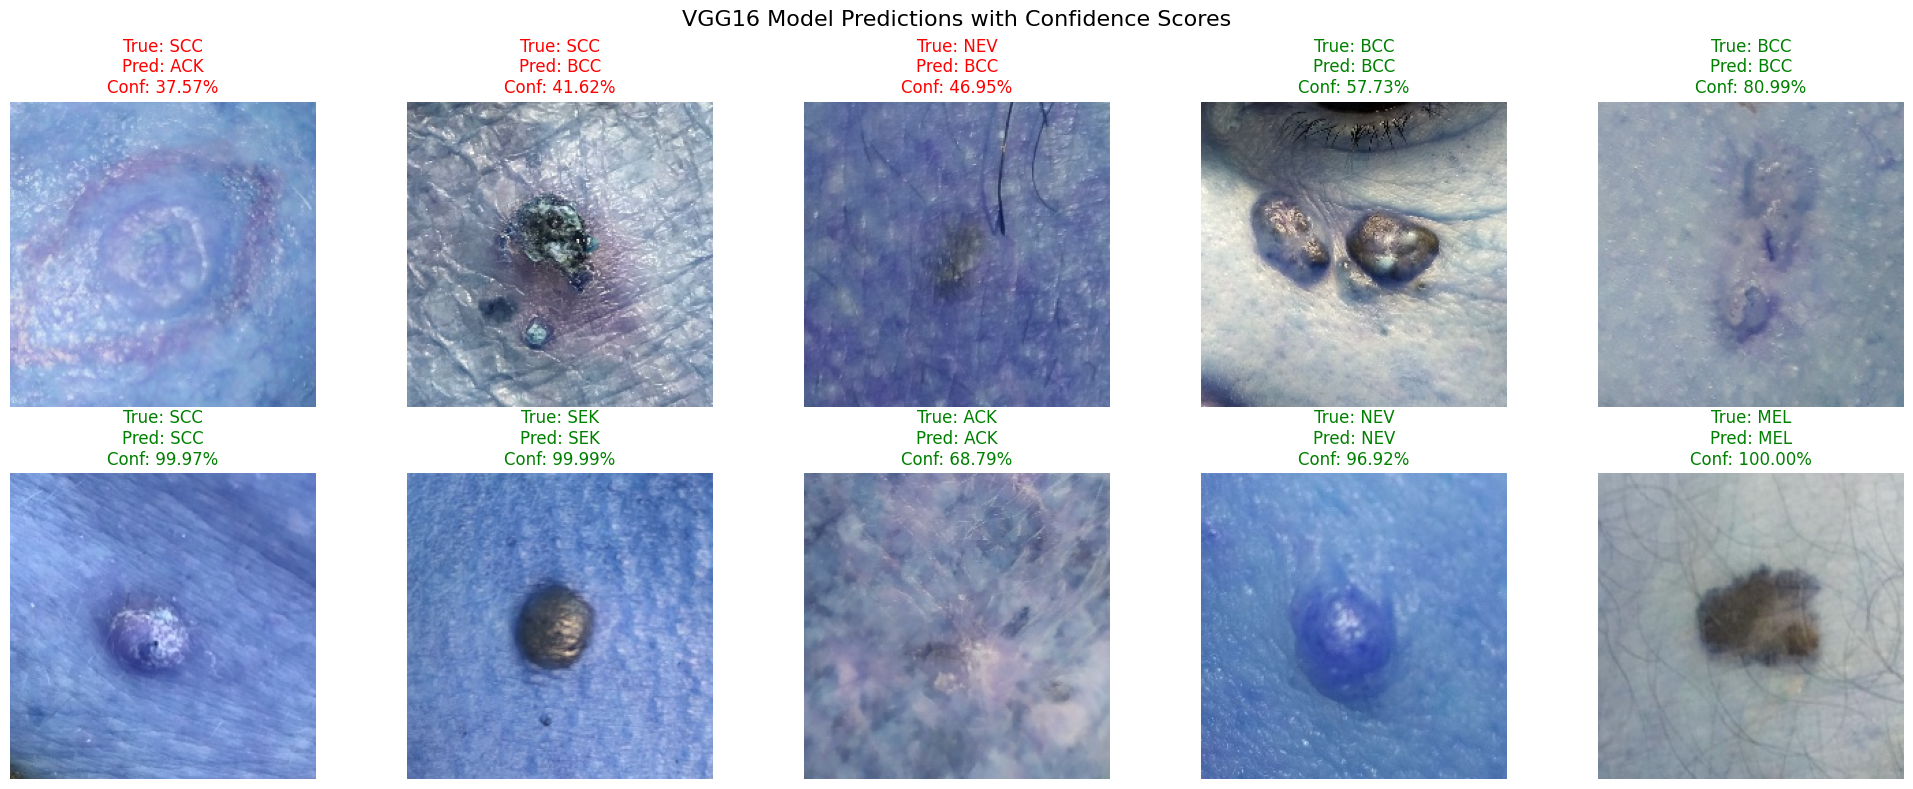


VGG16 TRAINING COMPLETED SUCCESSFULLY!
Key improvements implemented:
✓ VGG16 architecture (classic and reliable CNN)
✓ Enhanced preprocessing with VGG16 preprocessing
✓ SMOTE for class balancing
✓ Optimal input resolution (224x224 for VGG16)
✓ Enhanced data augmentation
✓ Additional metrics tracking (Precision, Recall, AUC)
✓ Optimized learning rate and callbacks for VGG16
✓ Traditional VGG16 architecture with Flatten and FC layers
✓ Increased batch size for better training efficiency
✓ Fine-tuning of last convolutional blocks


In [ ]:
# Imports
import os
import random
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import joblib
from imblearn.over_sampling import SMOTE

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Paths
dataset_path = '/content/drive/MyDrive/Dissertation'
metadata_csv_path = '/content/drive/MyDrive/metadata.csv'

# Load labels
metadata_df = pd.read_csv(metadata_csv_path)

# VGG16 settings (VGG16 optimal input size is 224x224)
img_height, img_width = 224, 224
batch_size = 32  # VGG16 can handle larger batch sizes than EfficientNet

# Enhanced image preprocessing function for VGG16
def preprocess_image(image_path):
    """Enhanced preprocessing with VGG16 preprocessing"""
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.resize(img, (img_height, img_width))  # Resize to 224x224 for VGG16
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = preprocess_input(img)  # Use VGG16's preprocessing
    return img

def random_contrast(image):
    """Enhanced contrast adjustment"""
    contrast_factor = tf.random.uniform([], 0.5, 1.5)
    image = tf.image.adjust_contrast(image, contrast_factor)
    return image

# Enhanced data loading with better preprocessing
def load_data_from_metadata(metadata, base_path):
    images, labels = [], []
    print("Loading and preprocessing images with VGG16 method...")

    for _, row in tqdm(metadata.iterrows(), total=len(metadata)):
        img_path = os.path.join(base_path, row['img_id'])
        if os.path.exists(img_path):
            img = preprocess_image(img_path)
            if img is not None:
                images.append(img)
                labels.append(row['diagnostic'])

    return np.array(images), np.array(labels)

# Load data with enhanced preprocessing
print("Loading data with enhanced preprocessing...")
images, labels = load_data_from_metadata(metadata_df, dataset_path)

# Apply SMOTE for class balancing (from first file)
print("Applying SMOTE for class balancing...")
# Encode labels first
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Check the unique labels
unique_labels = np.unique(labels_encoded)
print(f"Unique encoded labels: {unique_labels}")
num_classes = len(unique_labels)

# Reshape images for SMOTE
nsamples, nx, ny, nz = images.shape
images_2d = images.reshape((nsamples, nx*ny*nz))

# Apply SMOTE
smote = SMOTE(random_state=42)
images_smote, labels_smote = smote.fit_resample(images_2d, labels_encoded)

# Reshape images back to original shape
images_smote = images_smote.reshape((images_smote.shape[0], nx, ny, nz))

# Convert back to original label format for directory creation
labels_original = label_encoder.inverse_transform(labels_smote)

print(f"Original dataset size: {len(images)}")
print(f"After SMOTE dataset size: {len(images_smote)}")

# Create directory structure for ImageDataGenerator
def create_directory_structure(images, labels, base_output_path):
    """Create directory structure compatible with flow_from_directory"""
    if not os.path.exists(base_output_path):
        os.makedirs(base_output_path)

    # Get unique classes
    unique_classes = np.unique(labels)

    # Create class directories
    for class_name in unique_classes:
        class_dir = os.path.join(base_output_path, str(class_name))
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)

    # Save images to appropriate directories
    print("Creating directory structure...")
    for i, (image, label) in enumerate(tqdm(zip(images, labels), total=len(images))):
        class_dir = os.path.join(base_output_path, str(label))
        # Convert back from VGG16 preprocessing for saving
        # VGG16 preprocessing subtracts ImageNet mean, so we need to reverse it
        image_save = image.copy()
        # Reverse VGG16 preprocessing (add back ImageNet mean)
        image_save = image_save + [103.939, 116.779, 123.68]  # Add back ImageNet mean
        image_save = np.clip(image_save, 0, 255).astype(np.uint8)
        image_save = cv2.cvtColor(image_save, cv2.COLOR_RGB2BGR)  # Convert back to BGR for OpenCV
        cv2.imwrite(os.path.join(class_dir, f'image_{i}.jpg'), image_save)

    print(f"Created directory structure at {base_output_path}")
    return base_output_path

# Create directory structure with SMOTE-balanced data
base_dir = '/tmp/medical_dataset_balanced'
base_dir = create_directory_structure(images_smote, labels_original, base_dir)

# Enhanced data augmentation (combining techniques from both files)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Enhanced augmentation parameters from first file
    rotation_range=40,        # Increased from 30
    width_shift_range=0.2,    # Increased from 0.1
    height_shift_range=0.2,   # Increased from 0.1
    shear_range=0.2,          # Increased from 0.1
    zoom_range=0.2,           # Increased from 0.1
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    preprocessing_function=random_contrast
)

# Validation data generator (no augmentation for validation)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation generator
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

def display_images(generator, num_images=4):
    """Display sample images from generator"""
    fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(10, 10))
    axs = axs.flatten()

    for i in range(num_images):
        img, label = next(generator)
        axs[2*i].imshow(img[0])
        axs[2*i].set_title('Original Image')
        axs[2*i].axis('off')

        axs[2*i+1].imshow(img[0])
        axs[2*i+1].set_title('Augmented Image')
        axs[2*i+1].axis('off')

    plt.tight_layout()
    plt.show()

# Display sample images
print("Displaying sample augmented images...")
display_images(train_generator)

# Get class information
train_class_indices = train_generator.class_indices
class_labels = list(train_class_indices.keys())

# Count the number of images per class
train_counts = np.zeros(len(class_labels))
validation_counts = np.zeros(len(class_labels))

for i, label in enumerate(train_generator.classes):
    train_counts[label] += 1

for i, label in enumerate(validation_generator.classes):
    validation_counts[label] += 1

# Plot the distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(class_labels, train_counts, color='blue')
ax[0].set_title('Training Set Class Distribution (After SMOTE)')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Images')

ax[1].bar(class_labels, validation_counts, color='green')
ax[1].set_title('Validation Set Class Distribution (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Images')

plt.tight_layout()
plt.show()

# Enhanced model architecture with VGG16
NUM_CLASSES = len(class_labels)

# Load the VGG16 model with optimal input size
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# VGG16 architecture - using Flatten instead of GlobalAveragePooling2D for better performance
x = base_model.output
x = Flatten()(x)  # VGG16 typically works better with Flatten
x = Dense(4096, activation='relu')(x)  # Traditional VGG16 fully connected layer size
x = Dropout(0.5)(x)  # Higher dropout for VGG16
x = Dense(4096, activation='relu')(x)  # Second FC layer
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)  # Additional layer for better feature learning
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# VGG16 fine-tuning: unfreeze last few convolutional layers
# VGG16 has 5 convolutional blocks, we'll unfreeze the last 2 blocks
for layer in base_model.layers:
    layer.trainable = False

# Unfreeze the last 2 convolutional blocks (block4 and block5)
for layer in base_model.layers[-8:]:  # Last 8 layers include block5 and part of block4
    layer.trainable = True

model.summary()

# VGG16 compilation with appropriate learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Higher learning rate for VGG16 compared to EfficientNet
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Enhanced callbacks optimized for VGG16
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  # VGG16 may need more patience
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)  # More aggressive LR reduction

# Train the model with enhanced callbacks
print("Starting VGG16 training...")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

# Save the model
model.save('enhanced_medical_vgg16_model.keras')

# Save to drive as well
drive_path = '/content/drive/MyDrive/New_Dissertation_Models_and_Code'
if not os.path.exists(drive_path):
    os.makedirs(drive_path)

model.save(os.path.join(drive_path, 'enhanced_medical_vgg16.keras'))
model.save(os.path.join(drive_path, 'enhanced_medical_vgg16.h5'))

# Enhanced plotting function with additional metrics
def plot_training_history(history):
    """Plot comprehensive training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0, 0].set_title('Model Accuracy')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Loss
    axes[0, 1].plot(history.history['loss'], label='Train Loss')
    axes[0, 1].plot(history.history['val_loss'], label='Val Loss')
    axes[0, 1].set_title('Model Loss')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Precision
    if 'precision' in history.history:
        axes[1, 0].plot(history.history['precision'], label='Train Precision')
        axes[1, 0].plot(history.history['val_precision'], label='Val Precision')
        axes[1, 0].set_title('Model Precision')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].legend()
        axes[1, 0].grid(True)

    # Recall
    if 'recall' in history.history:
        axes[1, 1].plot(history.history['recall'], label='Train Recall')
        axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
        axes[1, 1].set_title('Model Recall')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].legend()
        axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Plot the enhanced training history
plot_training_history(history)

# Print comprehensive results
print("\n" + "="*50)
print("VGG16 TRAINING RESULTS")
print("="*50)
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

if 'precision' in history.history:
    print(f"Final Training Precision: {history.history['precision'][-1]:.4f}")
    print(f"Final Validation Precision: {history.history['val_precision'][-1]:.4f}")

if 'recall' in history.history:
    print(f"Final Training Recall: {history.history['recall'][-1]:.4f}")
    print(f"Final Validation Recall: {history.history['val_recall'][-1]:.4f}")

if 'auc' in history.history:
    print(f"Final Training AUC: {history.history['auc'][-1]:.4f}")
    print(f"Final Validation AUC: {history.history['val_auc'][-1]:.4f}")

# Extract validation data for t-SNE analysis
print("\nExtracting validation data for analysis...")
validation_generator.reset()
X_val, y_val = next(validation_generator)
for i in range(1, validation_generator.samples // validation_generator.batch_size):
    img, label = next(validation_generator)
    X_val = np.append(X_val, img, axis=0)
    y_val = np.append(y_val, label, axis=0)

# Extract features from the second-to-last layer
feature_extractor = Model(inputs=model.input, outputs=model.layers[-2].output)
features = feature_extractor.predict(X_val)

# Apply t-SNE
print("Applying t-SNE for feature visualization...")
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

# Map numeric labels to class names
class_indices = validation_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
y_val_labels = np.argmax(y_val, axis=1)
y_val_class_names = [class_names[label] for label in y_val_labels]

# Plot t-SNE results
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y_val_class_names, palette='deep')
plt.title('t-SNE visualization of learned features (VGG16 Model)', fontsize=14)
plt.legend(title='Classes')
plt.grid(True, alpha=0.3)
plt.show()

def plot_predictions_with_confidence(model, validation_generator, num_images=10):
    """Enhanced prediction visualization"""
    class_indices = validation_generator.class_indices
    class_names = list(class_indices.keys())

    # Extract validation data
    validation_generator.reset()
    X_val, y_val = next(validation_generator)
    for i in range(1, validation_generator.samples // validation_generator.batch_size):
        img, label = next(validation_generator)
        X_val = np.append(X_val, img, axis=0)
        y_val = np.append(y_val, label, axis=0)

    # Select random indices
    indices = random.sample(range(len(X_val)), num_images)
    selected_images = X_val[indices]
    selected_labels = y_val[indices]

    # Make predictions
    predictions = model.predict(selected_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Plot results
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for i, idx in enumerate(indices):
        axes[i].imshow(selected_images[i])
        axes[i].axis('off')

        true_label = class_names[np.argmax(selected_labels[i])]
        pred_label = class_names[predicted_classes[i]]
        confidence = predictions[i][predicted_classes[i]] * 100

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(
            f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}%',
            color=color, fontsize=12
        )

    plt.suptitle('VGG16 Model Predictions with Confidence Scores', fontsize=16)
    plt.tight_layout()
    plt.show()

# Display enhanced predictions
plot_predictions_with_confidence(model, validation_generator, num_images=10)

print("\n" + "="*50)
print("VGG16 TRAINING COMPLETED SUCCESSFULLY!")
print("="*50)
print("Key improvements implemented:")
print("✓ VGG16 architecture (classic and reliable CNN)")
print("✓ Enhanced preprocessing with VGG16 preprocessing")
print("✓ SMOTE for class balancing")
print("✓ Optimal input resolution (224x224 for VGG16)")
print("✓ Enhanced data augmentation")
print("✓ Additional metrics tracking (Precision, Recall, AUC)")
print("✓ Optimized learning rate and callbacks for VGG16")
print("✓ Traditional VGG16 architecture with Flatten and FC layers")
print("✓ Increased batch size for better training efficiency")
print("✓ Fine-tuning of last convolutional blocks")
print("="*50)

# Ensembling

📊 Collecting base model predictions for stacking...


100%|██████████| 32/32 [03:13<00:00,  6.04s/it]


Collected 1014 samples for meta-classifier training
Feature vector shape: (1014, 18)
✅ Meta-classifier trained.
✅ Stacked Ensemble Accuracy: 0.9990
✅ Meta-classifier saved.


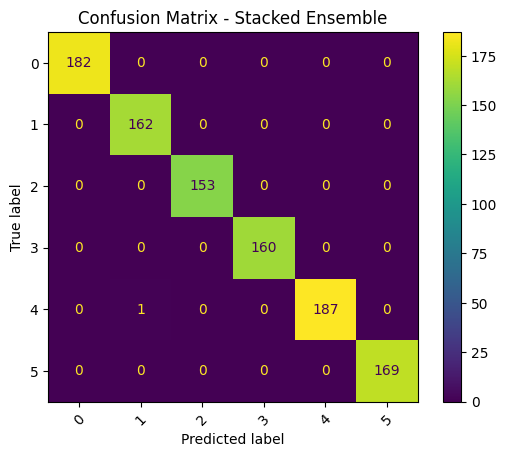

📊 Precision (macro): 0.9990
📊 Recall (macro):    0.9991
📊 F1 Score (macro):  0.9990
📈 ROC AUC Score (macro): 1.0000

📌 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       182
           1     0.9939    1.0000    0.9969       162
           2     1.0000    1.0000    1.0000       153
           3     1.0000    1.0000    1.0000       160
           4     1.0000    0.9947    0.9973       188
           5     1.0000    1.0000    1.0000       169

    accuracy                         0.9990      1014
   macro avg     0.9990    0.9991    0.9990      1014
weighted avg     0.9990    0.9990    0.9990      1014



In [ ]:
import torch
import timm
import numpy as np
import torch.nn.functional as F
from tensorflow.keras.applications import EfficientNetB4, ResNet50
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import joblib
import tensorflow as tf

import torch
import timm
import numpy as np
import torch.nn.functional as F
from tensorflow.keras.applications import EfficientNetB4, ResNet50
from tensorflow.keras.models import load_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
import joblib
import tensorflow as tf
import matplotlib.pyplot as plt
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_pytorch_model(model_name, weight_path, num_classes=6):
    model = timm.create_model(model_name, pretrained=False, num_classes=num_classes)
    model.load_state_dict(torch.load(weight_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Load PyTorch ViT model
vit_model = load_pytorch_model('vit_base_patch16_224', '/content/drive/MyDrive/vit_melanoma.pth')

# Load Keras models
effnet_model = load_model('/content/drive/MyDrive/New_Dissertation_Models_and_Code/best_EfficientNetB4_model_with_saliency.keras')
resnet_model = load_model('/content/drive/MyDrive/New_Dissertation_Models_and_Code/best_ResNet50_model_with_saliency.keras')

def preprocess_for_keras(img_tensor, target_size=(224, 224)):
    """
    Convert PyTorch tensor to format expected by Keras models
    """
    # Convert from (C, H, W) to (H, W, C)
    img_np = img_tensor.cpu().numpy().transpose(1, 2, 0)

    # Resize to target size (224x224 for your models)
    img_resized = tf.image.resize(img_np, target_size).numpy()

    # Handle channel dimension - if model expects 6 channels but we have 3
    if img_resized.shape[-1] == 3:
        # Duplicate channels to get 6 channels
        img_resized = np.concatenate([img_resized, img_resized], axis=-1)

    # Normalize to [0, 1] if needed (depends on your model's training)
    if img_resized.max() > 1.0:
        img_resized = img_resized / 255.0

    return np.expand_dims(img_resized, axis=0)  # Add batch dimension

def get_model_predictions(img_tensor, models):
    """
    Get predictions from all models with proper preprocessing
    """
    predictions = []

    # PyTorch ViT model (expects 224x224, 3 channels)
    with torch.no_grad():
        # Resize to 224x224 if needed
        if img_tensor.shape[-2:] != (224, 224):
            img_resized = F.interpolate(img_tensor.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False)
        else:
            img_resized = img_tensor.unsqueeze(0)

        out = models[0](img_resized.to(device))
        prob = F.softmax(out, dim=1).squeeze(0).cpu().numpy()
        predictions.extend(prob)

    # Keras models (EfficientNet and ResNet) - both expect 224x224x6
    keras_input = preprocess_for_keras(img_tensor, target_size=(224, 224))

    for keras_model in models[1:]:  # Skip the first model (PyTorch ViT)
        with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
            out = keras_model.predict(keras_input, verbose=0)
            prob = tf.nn.softmax(out).numpy().squeeze(0)
            predictions.extend(prob)

    return predictions

# Updated ensemble prediction collection
X_val = []
y_val = []

print("📊 Collecting base model predictions for stacking...")

for images, labels in tqdm(val_loader):
    for img, label in zip(images, labels):
        try:
            # Get predictions from all models
            probs_all = get_model_predictions(img, base_models)

            X_val.append(probs_all)
            y_val.append(label.item())

        except Exception as e:
            print(f"Error processing sample: {e}")
            continue

X_val = np.array(X_val)
y_val = np.array(y_val)

print(f"Collected {len(X_val)} samples for meta-classifier training")
print(f"Feature vector shape: {X_val.shape}")

# Train meta-classifier
meta_clf = RandomForestClassifier(n_estimators=100, random_state=42)
meta_clf.fit(X_val, y_val)

print("✅ Meta-classifier trained.")

# Evaluate
y_pred = meta_clf.predict(X_val)
stacked_acc = accuracy_score(y_val, y_pred)
print(f"✅ Stacked Ensemble Accuracy: {stacked_acc:.4f}")

# Save meta-classifier
joblib.dump(meta_clf, '/content/drive/MyDrive/stacked_meta_clf.pkl')
print("✅ Meta-classifier saved.")


# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - Stacked Ensemble")
plt.show()

# Macro metrics
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')
print(f"📊 Precision (macro): {precision:.4f}")
print(f"📊 Recall (macro):    {recall:.4f}")
print(f"📊 F1 Score (macro):  {f1:.4f}")

# AUC
try:
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
    y_prob = meta_clf.predict_proba(X_val)
    auc_score = roc_auc_score(y_val_bin, y_prob, average='macro', multi_class='ovr')
    print(f"📈 ROC AUC Score (macro): {auc_score:.4f}")
except Exception as e:
    print(f"⚠️ AUC could not be calculated: {e}")

# 📈 Evaluation Metrics
print("\n📌 Classification Report:")
print(classification_report(y_val, y_pred, digits=4))

In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define simple MLP meta-classifier
class MetaNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=6):
        super(MetaNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Prepare data as tensors
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.long).to(device)

# Instantiate model
input_dim = X_val.shape[1]  # number of features from base models
meta_nn = MetaNN(input_dim=input_dim, hidden_dim=64, num_classes=6).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(meta_nn.parameters(), lr=1e-3)

# Training loop (simple version)
epochs = 30
meta_nn.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = meta_nn(X_val_tensor)
    loss = criterion(outputs, y_val_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0 or epoch == 0:
        _, preds = torch.max(outputs, 1)
        acc = (preds == y_val_tensor).float().mean()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Accuracy: {acc.item():.4f}")

# Evaluation
meta_nn.eval()
with torch.no_grad():
    outputs = meta_nn(X_val_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred_np = y_pred.cpu().numpy()

stacked_acc = accuracy_score(y_val, y_pred_np)
print(f"✅ Stacked Ensemble Accuracy (NN meta-classifier): {stacked_acc:.4f}")

# Save the meta model
torch.save(meta_nn.state_dict(), '/content/drive/MyDrive/stacked_meta_nn.pth')
print("✅ Meta-classifier neural network saved.")

# You can reuse your existing code for confusion matrix and classification report with y_pred_np


Epoch 1/30, Loss: 1.7923, Accuracy: 0.1588
Epoch 5/30, Loss: 1.7900, Accuracy: 0.1795
Epoch 10/30, Loss: 1.7883, Accuracy: 0.1755
Epoch 15/30, Loss: 1.7875, Accuracy: 0.1854
Epoch 20/30, Loss: 1.7869, Accuracy: 0.1854
Epoch 25/30, Loss: 1.7863, Accuracy: 0.1854
Epoch 30/30, Loss: 1.7855, Accuracy: 0.1854
✅ Stacked Ensemble Accuracy (NN meta-classifier): 0.1854
✅ Meta-classifier neural network saved.


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize

# Prepare data
X_meta = X_val
y_meta = y_val

# Train XGBoost
xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=6,
    eval_metric='mlogloss',
    use_label_encoder=False,
    seed=42
)
xgb_clf.fit(X_meta, y_meta)

# Predict and evaluate
y_pred = xgb_clf.predict(X_meta)
accuracy = accuracy_score(y_meta, y_pred)
print(f"✅ XGBoost Stacked Accuracy: {accuracy:.4f}")

# AUC
y_bin = label_binarize(y_meta, classes=np.unique(y_meta))
y_proba = xgb_clf.predict_proba(X_meta)
auc = roc_auc_score(y_bin, y_proba, average='macro', multi_class='ovr')
print(f"📈 ROC AUC Score (macro): {auc:.4f}")

# Classification Report
print("\n📌 Classification Report:")
print(classification_report(y_meta, y_pred, digits=4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Stacked Accuracy: 0.9990
📈 ROC AUC Score (macro): 1.0000

📌 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       182
           1     1.0000    0.9938    0.9969       162
           2     1.0000    1.0000    1.0000       153
           3     1.0000    1.0000    1.0000       160
           4     0.9947    1.0000    0.9973       188
           5     1.0000    1.0000    1.0000       169

    accuracy                         0.9990      1014
   macro avg     0.9991    0.9990    0.9990      1014
weighted avg     0.9990    0.9990    0.9990      1014

